<a href="https://colab.research.google.com/github/RitwickSV/Neural-Networks/blob/main/Reuters_Multi_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary packages

In [1]:
import numpy as np
import keras
from keras import models, layers
from keras.datasets import reuters

# Import Data

In [2]:
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words = 10000)

2121728/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# Understanding the data

In [5]:
print(train_data[0])
print(len(train_data))

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
8982


This data contains the words which are hot encoded to have the news stored. We can also obtain the original news from the data we have.

In [8]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decoded_review)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


# Preparing data to be fit into the model
The train_data, contains the numbers corresponding to the sequences of the words and the train_labels contains the class. Let's hot encode the input so that they are converted into tensors. We can either

 * Pad all the samples in the train data and make them equal length or
 * One hot encode all the data into vectors.
Let's choose the 2nd option.

For the labels data we also need to one hot encode the labels to match the output loss that we will be using `categorical_crossentropy`

If we do not want to use one hot encoding we can pass the labels as integers using `np.array()` and use the loss `sparse_categorical_crossentropy`

In [9]:
from keras.utils.np_utils import to_categorical

def vectorize_sequences(sequences, dimension = 10000):
  result = np.zeros((len(sequences), dimension))
  for i,sequence in enumerate(sequences):
    result[i,sequence] = 1
  return result

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)



# Building the Model

We build our model using 2 hidden layers with 64 units each and a final layer which gives us the output.

We are using the relu activation function for the hidden layers, which nullifies all the values below zeros and the softmax function to the output layer which gives us the probability of each of the occurrence of the output.

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = ((10000,))))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

# Compile the model

We will be using the rmsprop optimiser and the categorical_crossentropy since this is a multi-class classification problem

In [11]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Let's set aside a validation set before we test.

In [12]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
model_summary = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 15s 84ms/step - loss: 3.1080 - accuracy: 0.3959 - val_loss: 1.7660 - val_accuracy: 0.6120
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5330 - accuracy: 0.6748 - val_loss: 1.3082 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1061 - accuracy: 0.7527 - val_loss: 1.1616 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 1s 47ms/step - loss: 0.8815 - accuracy: 0.8048 - val_loss: 1.0387 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.7056 - accuracy: 0.8502 - val_loss: 0.9695 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5527 - accuracy: 0.8847 - val_loss: 0.9328 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4330 - accuracy: 0.9143 - val_loss: 0.9081 - val_accuracy: 0.8070
Epoch 8/20
1

# Plotting to find the best epoch value

The `model_summary` value contains a parameter history which has the values of the loss and accuracy of the training and the validation. We will be using the parameters to attain the optimised value of the epoch for building the model.

In [14]:
history_dict = model_summary.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


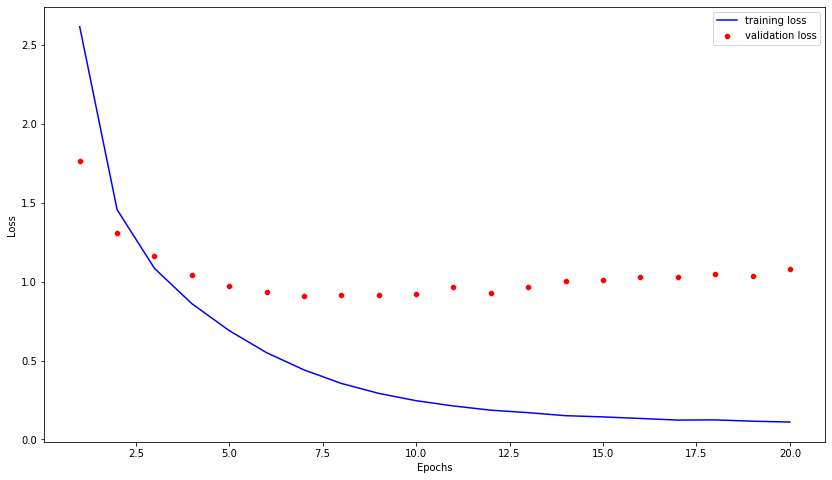

In [16]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize = (14,8))
sns.lineplot(x = epochs, y = loss_values, color = 'blue', label = 'training loss')
sns.scatterplot(x = epochs, y = val_loss_values, color = 'red', label = 'validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

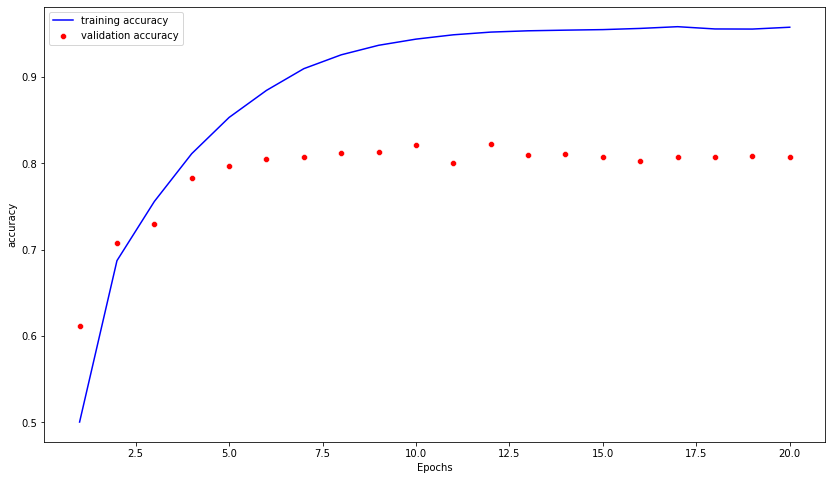

In [17]:
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize = (14,8))
sns.lineplot(x = epochs, y = acc_values, color = 'blue', label = 'training accuracy')
sns.scatterplot(x = epochs, y = val_acc_values, color = 'red', label = 'validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.show()

We can see that the loss starts increasing and the accuracy starts decreasing from around after the 9th epoch for the validation data.

Hence, we can build our model afresh using the epoch value to be 9.

In [26]:
model = models.Sequential()
model.add(layers.Dense(64, activation = 'tanh', input_shape = ((10000,))))
model.add(layers.Dense(64, activation = 'tanh'))
model.add(layers.Dense(46, activation = 'softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs = 6, batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/6
16/16 [==============================] - 2s 63ms/step - loss: 2.8502 - accuracy: 0.4580 - val_loss: 1.6162 - val_accuracy: 0.6490
Epoch 2/6
16/16 [==============================] - 1s 46ms/step - loss: 1.3831 - accuracy: 0.7140 - val_loss: 1.2379 - val_accuracy: 0.7280
Epoch 3/6
16/16 [==============================] - 1s 47ms/step - loss: 1.0191 - accuracy: 0.7934 - val_loss: 1.0693 - val_accuracy: 0.7670
Epoch 4/6
16/16 [==============================] - 1s 46ms/step - loss: 0.7678 - accuracy: 0.8527 - val_loss: 0.9600 - val_accuracy: 0.8060
Epoch 5/6
16/16 [==============================] - 1s 46ms/step - loss: 0.6065 - accuracy: 0.8929 - val_loss: 0.8909 - val_accuracy: 0.8220
Epoch 6/6
16/16 [==============================] - 1s 46ms/step - loss: 0.4595 - accuracy: 0.9182 - val_loss: 0.8503 - val_accuracy: 0.8230


In [27]:
result = model.evaluate(x_test,y_test) #to evaluate the prediction capacity of our model on the test data.
print(result)

71/71 [==============================] - 0s 3ms/step - loss: 0.9225 - accuracy: 0.7952
[0.9225114583969116, 0.7951914668083191]
